<a href="https://colab.research.google.com/github/lumimevi/Machine-Learning-Python/blob/master/Modelagem_Salmonella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INICIO**

A planilha de dados contém diversos índices ambientais (como NDVI, MNDWI, SAVI etc.), coordenadas geográficas, data de coleta e a coluna "Salmonella", que indica "Ausência" ou "Presença" da bactéria.

Vamos aplicar uma técnica de machine learning para prever a presença ou ausência de Salmonella com base nesses índices ambientais. A abordagem será:

In [ ]:
#Importações
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Carregar o dataset
df=pd.read_excel('/content/drive/MyDrive/dados_chile/coletas_indices_agua.xlsx', sheet_name=0)
print(df['Salmonella'].value_counts())
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Salmonella
Ausencia    1147
Presenca     704
Name: count, dtype: int64
     AWEI   EVI   GCI  GNDVI  LSWI  MNDWI  NDBI  NDTI  NDWI  SAVI Salmonella  \
0 -189.25  0.12  0.14   0.05 -0.03  -0.08  0.03  0.08 -0.05  0.06   Ausencia   
1    -333  0.00  0.11   0.06 -0.06  -0.12  0.06  0.12 -0.06  0.00   Ausencia   
2   -3940  1.45  0.15   0.52  0.05  -0.49 -0.05  0.49 -0.52  0.79   Ausencia   
3    4489 -0.19 -0.03   0.02  0.09   0.07 -0.09 -0.07 -0.02  0.07   Ausencia   
4   -1727  0.47  0.14   0.26 -0.03  -0.28  0.03  0.28 -0.26  0.27   Ausencia   

     lat   long month  year    Estacao  
0 -33.80 -70.88   Dec  2019  Primavera  
1 -33.80 -70.88   Nov  2019  Primavera  
2 -33.79 -70.89   Nov  2019  Primavera  
3 -33.78 -70.80   Abr  2019     Outono  
4 -33.78 -70.80   Jul  2019    Inverno  


In [ ]:
# Transformando a variável alvo em numérica
df['Salmonella'] = df['Salmonella'].map({'Presenca': 1, 'Ausencia': 0})
print(df.head())

     AWEI   EVI   GCI  GNDVI  LSWI  MNDWI  NDBI  NDTI  NDWI  SAVI  Salmonella  \
0 -189.25  0.12  0.14   0.05 -0.03  -0.08  0.03  0.08 -0.05  0.06           0   
1    -333  0.00  0.11   0.06 -0.06  -0.12  0.06  0.12 -0.06  0.00           0   
2   -3940  1.45  0.15   0.52  0.05  -0.49 -0.05  0.49 -0.52  0.79           0   
3    4489 -0.19 -0.03   0.02  0.09   0.07 -0.09 -0.07 -0.02  0.07           0   
4   -1727  0.47  0.14   0.26 -0.03  -0.28  0.03  0.28 -0.26  0.27           0   

     lat   long month  year    Estacao  
0 -33.80 -70.88   Dec  2019  Primavera  
1 -33.80 -70.88   Nov  2019  Primavera  
2 -33.79 -70.89   Nov  2019  Primavera  
3 -33.78 -70.80   Abr  2019     Outono  
4 -33.78 -70.80   Jul  2019    Inverno  


In [ ]:
# Remover colunas irrelevante
df = df.dropna()  # remover valores nulos
df = df.iloc[:, :-5]  #Remover colunas irrelevante
print(df.head())

     AWEI   EVI   GCI  GNDVI  LSWI  MNDWI  NDBI  NDTI  NDWI  SAVI  Salmonella
0 -189.25  0.12  0.14   0.05 -0.03  -0.08  0.03  0.08 -0.05  0.06           0
1    -333  0.00  0.11   0.06 -0.06  -0.12  0.06  0.12 -0.06  0.00           0
2   -3940  1.45  0.15   0.52  0.05  -0.49 -0.05  0.49 -0.52  0.79           0
3    4489 -0.19 -0.03   0.02  0.09   0.07 -0.09 -0.07 -0.02  0.07           0
4   -1727  0.47  0.14   0.26 -0.03  -0.28  0.03  0.28 -0.26  0.27           0


In [ ]:
# Separando features e target
X = df.drop("Salmonella", axis=1)
y = df["Salmonella"]

In [ ]:
# Padronizando os dados
numeric_cols = X.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numeric_cols])

In [ ]:
# Divisão de treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Equilibramos os dados usando a técnica SMOTETomek, é uma técnica de balanceamento de dados que combina duas abordagens: SMOTE (Synthetic Minority Over-sampling Technique):

Com o objetivo de aumentar a quantidade de amostras da classe minoritária (a classe com menos dados).
 Isso ajuda a equilibrar a distribuição das classes.

In [ ]:
# Balanceamento com SMOTETomek (Oversampling + Undersampling)
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

In [ ]:
# Verificando novo balanceamento
print("Distribuição após balanceamento:")
print(pd.Series(y_resampled).value_counts())


Distribuição após balanceamento:
Salmonella
1    807
0    807
Name: count, dtype: int64


Usamos LazyPredict para rapidamente avaliar vários classificadores.
O Lazy Predict ajuda a criar muitos modelos básicos sem muito código e ajuda a entender quais modelos funcionam melhor sem nenhum ajuste de parâmetro.

In [ ]:
#  Modelagem com LazyPredict
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_resampled, X_test, y_resampled, y_test)
# Resultados dos modelos
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 807, number of negative: 807
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 1614, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.55               0.56     0.56      0.56   
AdaBoostClassifier                 0.55               0.56     0.56      0.56   
NearestCentroid                    0.56               0.56     0.56      0.57   
LabelPropagation                   0.57               0.56     0.56      0.58   
ExtraTreeClassifi

#ExtraTreesClassifier  

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Criar uma instância do classificador ExtraTreesClassifier com parâmetros ajustados:
etc = ExtraTreesClassifier(n_estimators=100,  # Número de árvores na floresta
                              criterion='gini',  # Critério para avaliar a qualidade de uma divisão
                              max_depth=None,  # Profundidade máxima da árvore
                              min_samples_split=2,  # Número mínimo de amostras necessárias para dividir um nó interno
                              min_samples_leaf=1,  # Número mínimo de amostras necessárias em um nó folha
                              min_weight_fraction_leaf=0.0,  # Peso mínimo da fração de amostras em um nó folha
                              max_features='sqrt',  # Número de features a serem consideradas ao procurar a melhor divisão
                              max_leaf_nodes=None,  # Número máximo de nós folha
                              min_impurity_decrease=0.0,  # Diminuição mínima na impureza para que uma divisão seja feita
                              bootstrap=False,  # Se amostras de bootstrap devem ser usadas ao construir árvores
                              oob_score=False,  # Se a pontuação fora da bolsa deve ser calculada
                              n_jobs=None,  # Número de trabalhos a serem executados em paralelo
                              random_state=42,  # Semente aleatória para garantir resultados reproduzíveis
                              verbose=0,  # Controla a verbosidade do processo de treinamento
                              warm_start=False,  # Se o modelo deve ser inicializado com os resultados de um ajuste anterior
                              class_weight=None,  # Pesos associados às classes
                              ccp_alpha=0.0,  # Parâmetro de complexidade para poda de custo-complexidade
                              max_samples=None)  # Número de amostras a serem desenhadas de X para treinar cada árvore base


# 2. Treinar o modelo com os dados reamostrados (balanceados):
etc.fit(X_resampled, y_resampled)

# 3. Fazer previsões no conjunto de teste:
y_pred_etc = etc.predict(X_test)

# 4. Avaliar o modelo:
print("Acurácia:", accuracy_score(y_test, y_pred_etc))
print(classification_report(y_test, y_pred_etc))
print(confusion_matrix(y_test, y_pred_etc))

Acurácia: 0.5929919137466307
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       230
           1       0.46      0.38      0.41       141

    accuracy                           0.59       371
   macro avg       0.56      0.55      0.55       371
weighted avg       0.58      0.59      0.58       371

[[167  63]
 [ 88  53]]


#Matriz de confusão

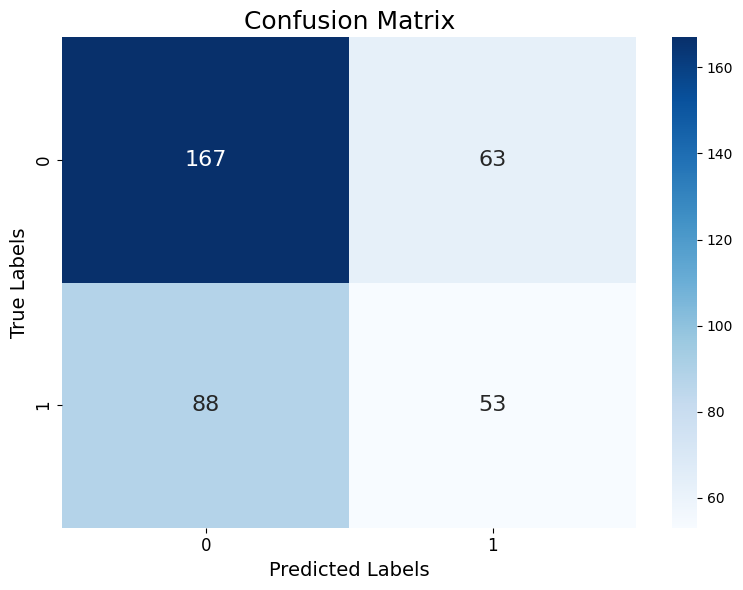

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_etc)

# Create a heatmap for the confusion matrix with larger font sizes
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}) # Increased font size
plt.title("Confusion Matrix", fontsize=18)  # Increased title font size
plt.xlabel("Predicted Labels", fontsize=14)  # Increased x-axis label font size
plt.ylabel("True Labels", fontsize=14)  # Increased y-axis label font size
plt.xticks(fontsize=12) # Increased xticks font size
plt.yticks(fontsize=12) # Increased yticks font size
plt.tight_layout()


# Export the plot to your Google Drive
plt.savefig('/content/drive/MyDrive/confusion_matrix.jpg', dpi=300) # Adjust the file path and DPI as needed
plt.show()
